# Linear vs Logistic Regression (NumPy) — Lab Notebook

**Goal:** build **Linear Regression** and **Logistic Regression** models *from scratch* using only **NumPy**, then compare their outputs.

---

## What you will learn
- How a model makes predictions (forward pass)
- How loss functions measure error
- How gradients update parameters with gradient descent
- Why logistic regression outputs probabilities but linear regression does not

## Step 0 — Imports
We only use NumPy for math and Matplotlib for plots.


In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Step 1 — Create a tiny dataset

We use a **1D input** `X` and **binary labels** `y`:

- `y = 1` for small digits (left side)
- `y = 0` for large digits (right side)

> In a real lab you would load a dataset, but this toy dataset makes the math easier to see.


In [2]:
X = np.array([1, 2, 3, 7, 8, 9], dtype=float).reshape(-1, 1) # Input
y = np.array([1, 1, 1, 0, 0, 0], dtype=float).reshape(-1, 1) # Target 
# LR based mapping between inputs and targets - Binary
n = X.shape[0] # Number of samples
######################################################################
print("n =", n)
print("X:", X.ravel())
print("y:", y.ravel())
X

n = 6
X: [1. 2. 3. 7. 8. 9.]
y: [1. 1. 1. 0. 0. 0.]


array([[1.],
       [2.],
       [3.],
       [7.],
       [8.],
       [9.]])

In [3]:
X1 = np.array([[1, 2, 3], [4, 5, 6]])
X1
X2 = X1.ravel()
print(X2.shape)

(6,)


In [4]:
X11 = np.array([[1, 2, 3], [4, 5, 6]])
X11
X14 = X11.reshape(-1, 1)
X14.shape

(6, 1)

In [5]:
X12 = np.array([[1, 2, 3], [4, 5, 6]])
X12
X13 = X12.flatten()
print(X13.shape)
X13

(6,)


array([1, 2, 3, 4, 5, 6])

# reval, flatten and reshpae(-1,1) - Matrix to vector

## Step 2 — Visualize the data

We color the points by class:
- blue: class 0
- orange: class 1


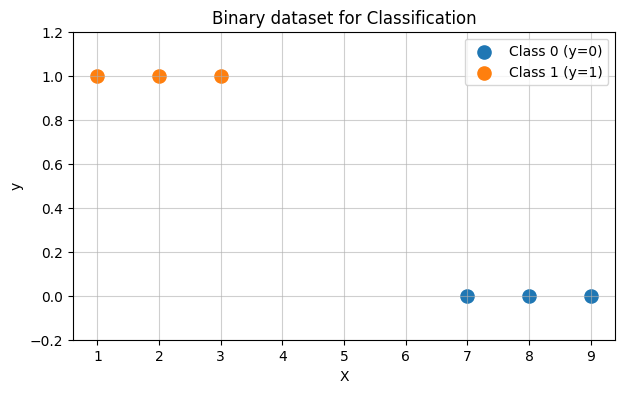

In [6]:
mask0 = (y.ravel() == 0) # Class 0 -Definition for classes
mask1 = (y.ravel() == 1) # Class 1
# Plotting the input points (X,y)
plt.figure(figsize=(7, 4))
plt.scatter(X[mask0], y[mask0], s=90, label="Class 0 (y=0)")
plt.scatter(X[mask1], y[mask1], s=90, label="Class 1 (y=1)")
plt.xlabel("X")
plt.ylabel("y")
plt.title("Binary dataset for Classification")
plt.ylim(-0.2, 1.2)
plt.grid(True, alpha=0.6)
plt.legend()
plt.show()

## Step 3 — Standardize the input `X`

Gradient descent is often easier when features are on a similar scale.

We compute:

- mean:  \(\mu\)
- std:   \(\sigma\)
- standardized input: \(X_{std} = (X - \mu) / \sigma\)


In [7]:
mu = float(np.mean(X))  # Mean
sigma = float(np.std(X)) # Standard Deviation
# Gaussian Normalization   X_std = X/np.max(X)
X_std = (X - mu) / sigma
print("mu    =", mu)
print("sigma =", sigma)

mu    = 5.0
sigma = 3.1091263510296048


### Quick check

After standardization, `X_std` should have:
- mean close to 0
- std close to 1


In [8]:
print("mean(X_std) =", float(np.mean(X_std)))
print("std(X_std)  =", float(np.std(X_std)))
print("X_std       =", np.round(X_std.ravel(), 4))

mean(X_std) = -3.700743415417188e-17
std(X_std)  = 1.0
X_std       = [-1.2865 -0.9649 -0.6433  0.6433  0.9649  1.2865]


# Part A — Linear Regression (for comparison)

**Model:**  \(\hat{y} = w x + b\)

**Loss (MSE):**  \(\text{MSE} = \frac{1}{n}\sum (\hat{y} - y)^2\)

> Linear regression can predict values **below 0** or **above 1**, so it is *not* a probability model.


## Step A1 — Linear prediction function

We write a small function for the forward pass:
- inputs: `X`, `w`, `b`
- output: `y_hat`


In [9]:
def predict_linear(X, w, b):
    return X * w + b

## Step A2 — Mean Squared Error (MSE) loss

This tells us how far predictions are from the true labels.


In [10]:
def mse_loss(y_hat, y):
    return float(np.mean((y_hat - y) ** 2))

## Step A3 — Gradients for linear regression

For MSE with \(\hat{y} = wx + b\):

- \(\frac{\partial \text{MSE}}{\partial w} = \frac{2}{n} \sum x(\hat{y}-y)\)
- \(\frac{\partial \text{MSE}}{\partial b} = \frac{2}{n} \sum (\hat{y}-y)\)


In [11]:
# Optimization putting error to 0 to find new values w and b
# Gradient Descent Optimization - Stochastic GD
def linear_grads(X, y, y_hat):
    n = y.shape[0]
    dw = (2.0 / n) * float(np.sum(X * (y_hat - y)))
    db = (2.0 / n) * float(np.sum(y_hat - y))
    return dw, db

## Step A4 — Choose a learning rate

A simple “safe-ish” learning rate in 1D can be:

- compute \(X^T X\)
- use \(L = \frac{2}{n}(X^T X)\)
- set \(\text{lr} = 1/L\)

(We do this only to avoid guessing.)


In [12]:
# Learning rate calculation from Input vectors
xtx = float((X_std.T @ X_std).ravel()[0]) # @ symbol is matrix multiplication
L_lin = (2.0 / n) * xtx # NORMALIZE WITH MEAN
lr_lin = 1.0 / L_lin
epochs_lin = 3000

print("xtx   =", xtx)
print("L_lin =", L_lin)
print("lr    =", lr_lin)

xtx   = 6.0
L_lin = 2.0
lr    = 0.5


## Step A5 — One forward pass (before training)

We start with `w = 0` and `b = 0`.


In [13]:
w_lin_s, b_lin_s = 0.0, 0.0
y_hat = predict_linear(X_std, w_lin_s, b_lin_s)
print("predictions:", np.round(y_hat.ravel(), 4))
print("MSE loss   :", mse_loss(y_hat, y))

predictions: [0. 0. 0. 0. 0. 0.]
MSE loss   : 0.5


## Step A6 — One gradient descent step

This cell shows the **update rule**:

- compute gradients `dw`, `db`
- update parameters:
  - `w = w - lr * dw`
  - `b = b - lr * db`


In [14]:
dw, db = linear_grads(X_std, y, y_hat)
w_lin_s = w_lin_s - lr_lin * dw
b_lin_s = b_lin_s - lr_lin * db

print("dw =", dw, "db =", db)
print("updated w_std =", w_lin_s)
print("updated b_std =", b_lin_s)


dw = 0.9649012813540154 db = -1.0
updated w_std = -0.4824506406770077
updated b_std = 0.5


## Step A7 — Training loop (many small steps)

We repeat the same pattern for many epochs:
1. forward pass
2. loss
3. gradients
4. update

We also store the loss so we can plot it.


In [15]:
w_lin_s, b_lin_s = 0.0, 0.0
loss_lin = []
for epoch in range(epochs_lin):
    y_hat = predict_linear(X_std, w_lin_s, b_lin_s) # y_pred = W*X+b
    loss = mse_loss(y_hat, y) # Loss = 1/n*(y_pred - y)**2
    loss_lin.append(loss)

    dw, db = linear_grads(X_std, y, y_hat)
    w_lin_s -= lr_lin * dw
    b_lin_s -= lr_lin * db

    if epoch % 1000 == 0:
        print(epoch, "loss =", round(loss, 6))

0 loss = 0.5
1000 loss = 0.017241
2000 loss = 0.017241


## Step A8 — Plot linear training loss

If training is working, the loss should decrease.


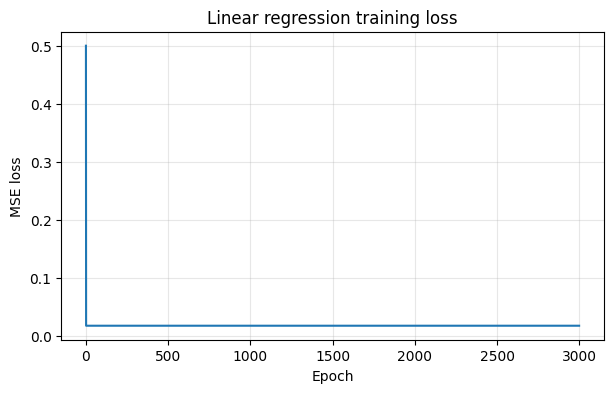

In [16]:
plt.figure(figsize=(7, 4))
plt.plot(loss_lin)
plt.xlabel("Epoch")
plt.ylabel("MSE loss")
plt.title("Linear regression training loss")
plt.grid(True, alpha=0.3)
plt.show()

## Step A9 — Convert parameters back to original `X` scale

We trained on `X_std`, but we want a model in terms of original `X`.

Because:

\[
X_{std} = \frac{X - \mu}{\sigma}
\]

and

\[
\hat{y} = w_s X_{std} + b_s
\]

we get:

- \(w = w_s/\sigma\)
- \(b = b_s - (w_s\mu/\sigma)\)


In [17]:
w_lin = w_lin_s / sigma
b_lin = b_lin_s - (w_lin_s * mu / sigma)
#print("w (original scale) =", w_lin)
#print("b (original scale) =", b_lin)

## Step A10 — Plot the fitted line

This shows what linear regression “thinks” the relationship is.


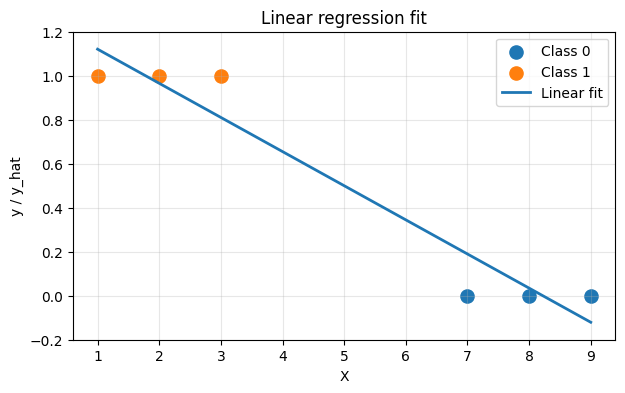

In [18]:
x_line = np.linspace(X.min(), X.max(), 200).reshape(-1, 1)
y_line = predict_linear(x_line, w_lin, b_lin)
plt.figure(figsize=(7, 4))
plt.scatter(X[mask0], y[mask0], s=90, label="Class 0")
plt.scatter(X[mask1], y[mask1], s=90, label="Class 1")
plt.plot(x_line, y_line, linewidth=2, label="Linear fit")
plt.xlabel("X")
plt.ylabel("y / y_hat")
plt.title("Linear regression fit")
plt.ylim(-0.2, 1.2)
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()


# Part B — Logistic Regression (probability model)

**Model:**
- compute score: \(z = wx + b\)
- convert to probability: \(p = \sigma(z)\)

**Sigmoid:**
\[
\sigma(z) = \frac{1}{1 + e^{-z}}
\]

**Loss (log loss / cross-entropy):**
\[
-\frac{1}{n} \sum \left(y\log(p) + (1-y)\log(1-p)\right)
\]

> Logistic regression outputs a **probability** between 0 and 1.


## Step B1 — Sigmoid function

The sigmoid “squashes” any real number into (0, 1).


In [19]:
def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))
# Draw the sigmoid function - Task 1
# Push all positives to 1 and negatives to 0

## Step B2 — Predict probability

We compute:
1. `z = w*x + b`
2. `p = sigmoid(z)`


In [20]:
def predict_proba(X, w, b):
    z = X * w + b
    return sigmoid(z)
# Output of linear regression is passed through Sigmoid fuction

## Step B3 — Log loss (cross-entropy)

We use `np.clip` to avoid log(0).


In [21]:
def log_loss(p, y):
    eps = 1e-12
    p = np.clip(p, eps, 1 - eps)
    return float(-np.mean(y * np.log(p) + (1 - y) * np.log(1 - p)))
# p - Predicted value and y - target value
# Task - 2: Differentiate the Loss function and find dw and db

## Step B4 — Gradients for logistic regression

For binary cross-entropy with sigmoid:

- \(\frac{\partial L}{\partial w} = \frac{1}{n}\sum x(p - y)\)
- \(\frac{\partial L}{\partial b} = \frac{1}{n}\sum (p - y)\)


In [22]:
def logistic_grads(X, y, p):
    n = y.shape[0]
    dw = (1.0 / n) * float(np.sum(X * (p - y))) # Change in weight
    db = (1.0 / n) * float(np.sum(p - y)) # Change in bias
    return dw, db

## Step B5 — Choose a learning rate

For 1D logistic regression, a useful bound is:

\[
L \approx \frac{1}{4n}(X^T X)
\]

so we can set `lr = 1/L`.


In [23]:
xtx = float((X_std.T @ X_std).ravel()[0])
L_log = (1.0 / (4.0 * n)) * xtx

lr_log = 1.0 / L_log
epochs_log = 3000
###########################
print("xtx   =", xtx)
print("L_log =", L_log)
print("lr    =", lr_log)
# Ask code gen to write a learning rate selector - fail

xtx   = 6.0
L_log = 0.25
lr    = 4.0


## Step B6 — One forward pass (before training)


In [24]:
w_log_s, b_log_s = 0.0, 0.0

p = predict_proba(X_std, w_log_s, b_log_s)
print("p:", np.round(p.ravel(), 4))
print("log loss:", log_loss(p, y))

p: [0.5 0.5 0.5 0.5 0.5 0.5]
log loss: 0.6931471805599453


## Step B7 — Training loop


In [33]:
w_log_s, b_log_s = 0.0, 0.0 # Initialize weights and bias
loss_log = [] # Define empty list
# Every training loop on the Earth for AI and ML
for epoch in range(epochs_log):
    p = predict_proba(X_std, w_log_s, b_log_s) # Step_1: Predict 
    loss = log_loss(p, y) # Find error or loss with respect to target
    loss_log.append(loss)

    dw, db = logistic_grads(X_std, y, p) # Step_3: Optimize to find ideal w and b
    w_log_s -= lr_log * dw # Step_4: Update weights and bias
    b_log_s -= lr_log * db

    if epoch % 500 == 0:
        print(epoch, "loss =", round(loss, 6))

0 loss = 0.693147
500 loss = 0.00109
1000 loss = 0.00056
1500 loss = 0.000378
2000 loss = 0.000286
2500 loss = 0.00023


## Step B8 — Plot logistic training loss


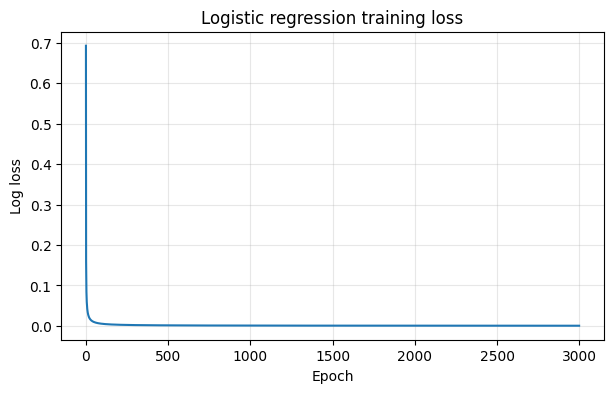

In [26]:
plt.figure(figsize=(7, 4))
plt.plot(loss_log)
plt.xlabel("Epoch")
plt.ylabel("Log loss")
plt.title("Logistic regression training loss")
plt.grid(True, alpha=0.3)
plt.show()

## Step B9 — Convert logistic parameters back to original `X` scale

Same conversion rule as linear regression:
- `w = w_std / sigma`
- `b = b_std - (w_std * mu / sigma)`


In [27]:
w_log = w_log_s / sigma
b_log = b_log_s - (w_log_s * mu / sigma)

print("w (original scale) =", w_log)
print("b (original scale) =", b_log)

w (original scale) = -3.740321763956755
b (original scale) = 18.70160881978377


## Step B10 — Plot probability curve

We plot:
- training points
- predicted probability `p(x)`


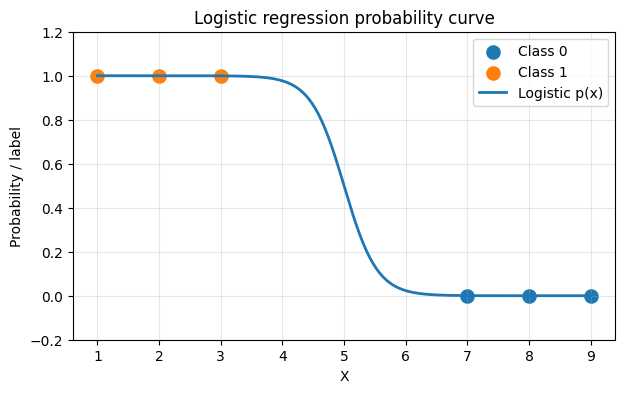

In [28]:
x_line = np.linspace(X.min(), X.max(), 300).reshape(-1, 1)
p_line = predict_proba(x_line, w_log, b_log)
plt.figure(figsize=(7, 4))
plt.scatter(X[mask0], y[mask0], s=90, label="Class 0")
plt.scatter(X[mask1], y[mask1], s=90, label="Class 1")
plt.plot(x_line, p_line, linewidth=2, label="Logistic p(x)")
plt.xlabel("X")
plt.ylabel("Probability / label")
plt.title("Logistic regression probability curve")
plt.ylim(-0.2, 1.2)
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()
# Task 3: Take 30 numbers with 50% 1's and 50% 0's in y and apply logistic regression
# Task 4: Take 40% 1's and 60% 0's
# Task 5: Take 25% 1's and 75% 0's

## Step B11 — Decision boundary (p = 0.5)

For logistic regression, `p = 0.5` happens when `z = 0`.

So the boundary is:

\[
x^* = -b/w
\]


In [29]:
if w_log != 0:
    x_star = -b_log / w_log
    print("Decision boundary x* =", x_star)
else:
    print("w_log is 0, boundary is undefined")

Decision boundary x* = 4.999999999999999


# Part C — Compare outputs on the training points

We will show:
- linear regression score \(\hat{y}\)
- logistic regression probability \(p\)

Notice:
- \(\hat{y}\) is not forced into [0, 1]
- \(p\) is always between 0 and 1


In [30]:
y_lin_train = predict_linear(X, w_lin, b_lin).ravel()
p_train = predict_proba(X, w_log, b_log).ravel()

print("  X   y   y_hat_linear   p_logistic")
for xi, yi, yhi, pi in zip(X.ravel(), y.ravel(), y_lin_train, p_train):
    print(f"{xi:3.0f}  {yi:1.0f}     {yhi:8.4f}     {pi:8.4f}")

  X   y   y_hat_linear   p_logistic
  1  1       1.1207       1.0000
  2  1       0.9655       1.0000
  3  1       0.8103       0.9994
  7  0       0.1897       0.0006
  8  0       0.0345       0.0000
  9  0      -0.1207       0.0000


# Mini exercises (optional)

1. Try changing `epochs_lin` and `epochs_log` (smaller / larger).
2. Try multiplying `lr_lin` or `lr_log` by 0.5 or 2 and observe what happens.
3. Add more `X` values (and labels) and re-train.

> Keep changes small, then re-run from the top.


# Summary

- **Linear regression** fits a line to minimize **squared error**.
  - output can be any real number (not a probability)

- **Logistic regression** fits a line **inside a sigmoid** to minimize **log loss**.
  - output is a probability between 0 and 1
